In [ ]:
# Importing modules
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
import math

# Logistic Regression

In [ ]:
# Load Iris Dataset - for Classification
iris = datasets.load_iris()

In [3]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
X_orig = iris.data[:, [0,3]].copy()
tmp = iris.target.copy()
tmp[tmp == 2] = 1
#tmp[tmp == 1] = 1
#tmp[tmp == 0] = 1
y_orig = tmp.copy()
y = np.reshape(y_orig,(len(y_orig),1))
# 0 : setosa
# 1 : not setosa
print(np.unique(y))
print(len(X_orig))

[0 1]
150


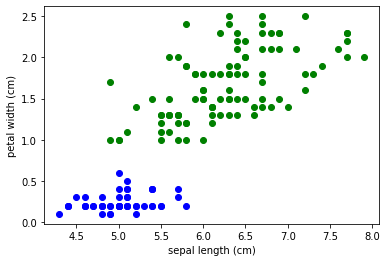

In [5]:
setosa = X_orig[y_orig==0]
not_setosa = X_orig[y_orig==1]
plt.scatter(setosa[:,0],setosa[:,1],c='b')
plt.scatter(not_setosa[:,0],not_setosa[:,1],c='g')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
a = []
plt.show()

In [6]:
X = np.hstack((np.ones((len(X_orig),1)), X_orig))
print(X.shape)
X[:5,:]

(150, 3)


array([[1. , 5.1, 0.2],
       [1. , 4.9, 0.2],
       [1. , 4.7, 0.2],
       [1. , 4.6, 0.2],
       [1. , 5. , 0.2]])

In [7]:
theta = np.ones((len(X[0]), 1) )
print(theta.shape)
theta

(3, 1)


array([[1.],
       [1.],
       [1.]])

In [8]:
def single_cost(xi, theta, yi):
    ''' Returns the cost for one sample '''
    return - ( yi * math.log10( sigmoid(xi @ theta) ) + (1 - yi) * math.log10( 1 - sigmoid(xi @ theta) ) )


In [9]:

a = 1
#a = single_cost(X,theta,y)
k = list(map(sigmoid, X@theta))
np.reshape(k, (len(k), 1))
np.array(k)-y
l = np.array([1,2,3])
l*l
X[:,1].shape
k = list(map(sigmoid, X@theta))
k = k - y
k = k @ X[:,0]
k[:5]

NameError: ignored

In [10]:
#np.dot(X,theta)
#X@theta
theta = np.ones((len(X[0]),1) )
k = sigmoid(X @ theta)
k = k - y
#deriv[j] = k @ X[:,j]
#print(k.shape)
print(y.shape)
#print(k[:5])
k[0] = 1
#print(k[:5])
print(X.shape,'\n')
(k.T @ X[:,0]).shape


NameError: ignored

In [11]:
## This is not being used
train_X, test_X, train_y, test_y = train_test_split(X, y_orig, test_size=0.2, shuffle=True, random_state=42)
train_y = np.reshape(train_y,(len(train_y),1))
test_y = np.reshape(test_y,(len(test_y),1))
train_X[:10], train_y[:10]

(array([[1. , 4.6, 0.2],
        [1. , 5.7, 0.4],
        [1. , 6.7, 1.4],
        [1. , 4.8, 0.2],
        [1. , 4.4, 0.2],
        [1. , 6.3, 1.9],
        [1. , 6.4, 1.5],
        [1. , 5.2, 0.2],
        [1. , 5. , 0.2],
        [1. , 5.2, 0.1]]), array([[0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0]]))

In [12]:
num_iter = 3e5
i = 1
alpha = 0.1
theta = np.ones((len(X[0]), 1) )

while i <= num_iter:
    deriv = cost_func_derivative(X, theta, y)
    new_theta = theta.copy()
    for j in range(len(deriv)):
        new_theta[j] -= deriv[j]*alpha  #/ len(X)
    theta = new_theta.copy()
    i += 1
theta

NameError: ignored

In [13]:
print('Min x_1:', np.min(X[:,0]), 'Max x_1:', np.max(X[:,0]))
print('Min x_2:', np.min(X[:,1]), 'Max x_2:', np.max(X[:,1]))

Min x_1: 1.0 Max x_1: 1.0
Min x_2: 4.3 Max x_2: 7.9


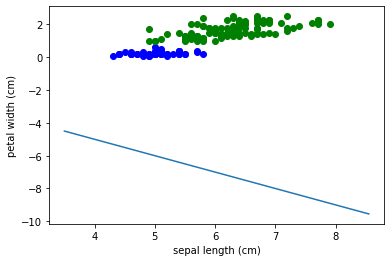

In [14]:
## Decision boundary: theta_0 + theta_1 * x_1 + theta_2 * x_2 = 0
## x_2 = - ( theta_0 + theta_1 * x_1 ) / theta_2
a_1 = np.arange(3.5,8.55,0.05)
a_2 =  - ( theta[0] + theta[1] * a_1 ) / theta[2]

setosa = X_orig[y_orig==0]
not_setosa = X_orig[y_orig==1]
plt.scatter(setosa[:,0],setosa[:,1],c='b')
plt.scatter(not_setosa[:,0],not_setosa[:,1],c='g')

plt.plot(a_1, a_2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

In [15]:
a = np.array([[1,2,3] for i in range(3)])
b = np.ones((3,1))
b[1] = 2
b[2] = 3

print(a)
print()
print(np.min(a,axis=0))
print(np.min(a,axis=1))
(a == b).astype('int8')

[[1 2 3]
 [1 2 3]
 [1 2 3]]

[1 2 3]
[1 1 1]


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# sklearn Logistic Regression model

clf = LogisticRegression(random_state=0).fit(X, y_orig)
print()
print('Intercept:', clf.intercept_)
print('Coefficients:', clf.coef_)
print()


Intercept: [-10.48152877]
Coefficients: [[1.92537545e-05 1.39836078e+00 3.91315011e+00]]



# Neural Networks

In [18]:
def sigmoid_derivative(z):
    ''' Returns the derivate of the sigmoid function at z '''
    return z * (1 - z)

In [19]:
class NeuralNetwork:
    ''' Neural Network class - Two fully connected layers '''
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.weights_layer1 = np.random.rand(self.X.shape[1], 100)
        self.weights_layer2 = np.random.rand(100, y.shape[1])
        self.alpha = 0.05 # Learning Rate
    
    def forwardprop(self):
        ''' Performs forward propagation for the entire neural network for one epoch '''
        self.a_layer1 = sigmoid(np.dot(self.X, self.weights_layer1))
        self.a_layer2 = np.dot(self.a_layer1, self.weights_layer2)
        self.out = self.a_layer2
    
    def backprop(self):
        ''' Performs backward propagation for the entire neural network for one epoch '''
        err2 = 2*(self.y - self.out) * sigmoid_derivative(self.out)
        diff_weights_layer2 = np.dot(self.a_layer1.T, err2)
        
        err1 = np.dot(err2, self.weights_layer2.T) * sigmoid_derivative(self.weights_layer1)
        diff_weights_layer1 = np.dot(self.input.T, err1)
        
        
        self.weights_layer1 -= self.alpha * diff_weights_layer1
        self.weights_layer2 -= self.alpha * diff_weights_layer2
    
    def train(self, epochs = 100):
        ''' Trains the model for a given numbe of epochs '''
        self.epochs = 100
        for i in range(epochs):
            self.forwardprop()
            self.backprop()
    
    def predict(self, X_test):
        ''' Predicts the classes of the given input samples '''
        a1 = sigmoid(np.dot(self.X, self.weights_layer1))
        a2 = np.dot(a1, self.weights_layer2)
        max_val = np.max(a2, axis=1)
        max_val2 = np.reshape(max_val, (len(max_val), 1))
        pred = (a2 == max_val2).astype('int8')
        pred_single = [list(a2[i]).index(max_val[i]) for i in range(len(max_val))]
        return pred, pred_single
        
        


In [20]:
X = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
y = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
nn = NeuralNetwork(X,y)

In [23]:
nn.train()
nn.predict(np.array([1,1,1]))

NameError: ignored

In [22]:
df = pd.read_csv('mnist_digits.csv')
X = df.copy()
y = X['digit']
del X['digit']

FileNotFoundError: ignored